# Introduction to Regresion with Neural Networks in TensorFlow
There are many definitios for regression problem but in our case, we're going to simplify it: predecting a numerical variable based on some other combination of variables, even shorter ... predecting a number.

In [1]:
# Impor TensorFlow
import tensorflow as tf
print(tf.__version__)

2.18.0


## Creating data to view and fit

In [2]:
import numpy as np
import matplotlib.pyplot as plt

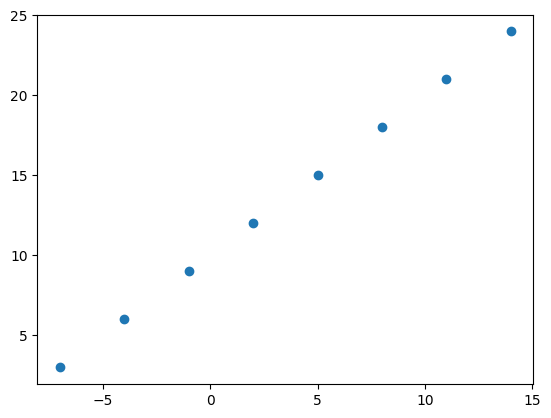

In [3]:
# Create features
X = np.array([-7,-4,-1,2,5,8,11,14])

# Create labels
y = np.array([3,6,9,12,15,18,21,24])

# Visualize it
plt.scatter(X,y)

In [4]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0],y[0]

(-7, 3)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0],y[0]

(-7, 3)

In [10]:
# Turn NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

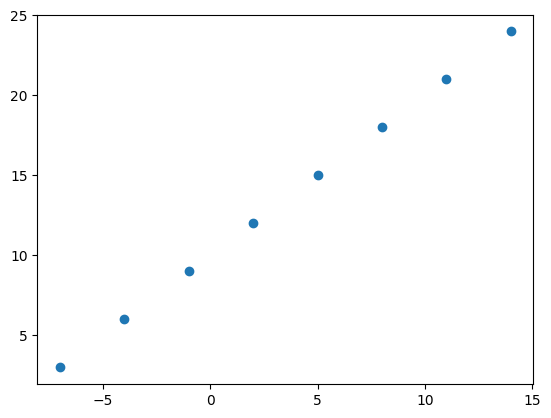

In [12]:
plt.scatter(X,y)

## Steps in modelling with Tensorflow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to imporve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model **- letting the model try to find patterns between X & y (features and labels).

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1.Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step - loss: 9.4754 - mae: 9.4754
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 9.3429 - mae: 9.3429
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 9.2104 - mae: 9.2104
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 9.0779 - mae: 9.0779
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 8.9454 - mae: 8.9454


In [14]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>)

In [15]:
# Try and make a prediction using our model
y_pred = model.predict(np.array([17]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[22.572847]], dtype=float32)

In [16]:
y_pred + 11

array([[33.572845]], dtype=float32)

## Improving our model

we can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation fuction of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting the model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model examples to learn from).

In [17]:
# Let's rebuild our model

# 1.Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - loss: 16.6813 - mae: 16.6813
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 16.4000 - mae: 16.4000
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 16.1188 - mae: 16.1188
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 15.8375 - mae: 15.8375
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 15.5563 - mae: 15.5563
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 15.2750 - mae: 15.2750
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 14.9938 - mae: 14.9938
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 14.7821 - mae: 14.7821
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 14.6496 - mae: 14.6496
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 14.5171 - mae: 14.5171
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 14.3846 - mae: 14.3846
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 14.2521 - mae: 14.2521
Epoch 13/100
1/1 ━━━━━━━

In [18]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>)

In [19]:
model.predict(np.array([17]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[29.520226]], dtype=float32)

In [20]:
 # Let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])
# 2. Compile our model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.1310 - mae: 12.1310
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 11.4565 - mae: 11.4565
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 10.7751 - mae: 10.7751
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 10.0856 - mae: 10.0856
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 9.3864 - mae: 9.3864
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 8.6752 - mae: 8.6752
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 7.9498 - mae: 7.9498
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 7.2074 - mae: 7.2074
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 6.8941 - mae: 6.8941
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 7.1597 - mae: 7.1597
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 7.4268 - mae: 7.4268
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 7.6506 - mae: 7.6506
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━

In [21]:
X,y

(<tf.Tensor: shape=(8,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>)

In [22]:
model.predict(np.array([17]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[25.710077]], dtype=float32)

## Evaluating a model

In practice, a typical a workflow you'll go through when building neural networks is:

Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> ...

When it comes to evaluation ... there are 3 words you should memorize:

> "Visualize, visualize, vizualize"

It's a good idea to visualize:

* The data  - what data are working with ? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the modle - how do the predictions of a model line up against the grounds truth (the original labels) ?

In [23]:
# Make a bigger data set
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [24]:
# Make labels fot the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

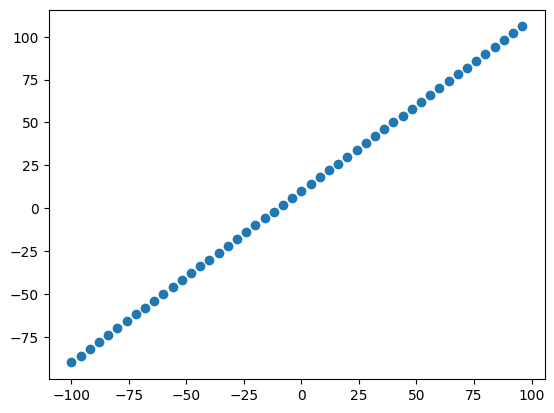

In [25]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets ...
* **Trainin set** - the model learn from this data, whic is typically 70-80% of the total data you have avaible.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data avaible.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data avaible.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# Check the length of how many samples we have
len(X)

50

In [28]:
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]
len(X_train),len(X_test), len(y_train),len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got out data in training and test sets... let's visualize it again!

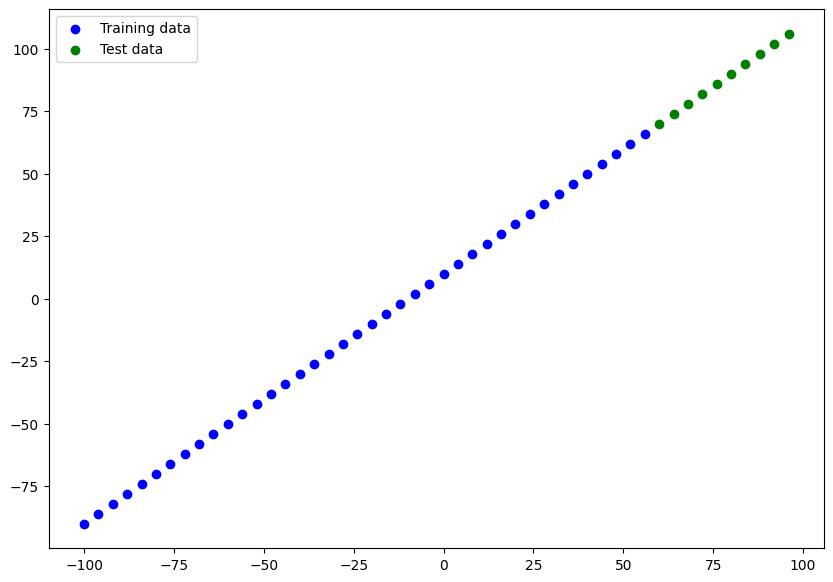

In [29]:
plt.figure(figsize=(10,7))
#plot training data in blue
plt.scatter(X_train,y_train,c="b",label="Training data")
# plot test data in green
plt.scatter(X_test,y_test,c="g",label="Test data")
# show a legend
plt.legend()

In [30]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

In [31]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1]),
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model.
* Trainable params - these are the parameters (patterns) the model can update as it train.
* Non-trainable params - these parameters aren't uodated during the training (this typical when you bring in already learn patterns from other models during transfer learning).


In [33]:
# 3. Fit the model
model.fit(X_train,y_train,epochs=100,verbose=0)

In [34]:
# Get a summary of our model
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

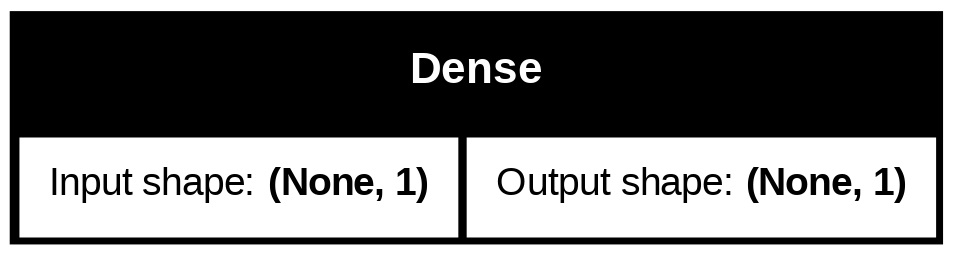

In [35]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of "y_test" or "y_true" versus "y_pred" (ground truth versus your model)

In [36]:
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[ 63.726257],
       [ 67.88272 ],
       [ 72.03918 ],
       [ 76.19564 ],
       [ 80.3521  ],
       [ 84.50856 ],
       [ 88.665016],
       [ 92.82147 ],
       [ 96.977936],
       [101.13439 ]], dtype=float32)

In [37]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [38]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  # plot test data in green
  plt.scatter(test_data,test_labels,c="g",label="Test data")
  # plot model's predictions
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  # show a legend
  plt.legend()

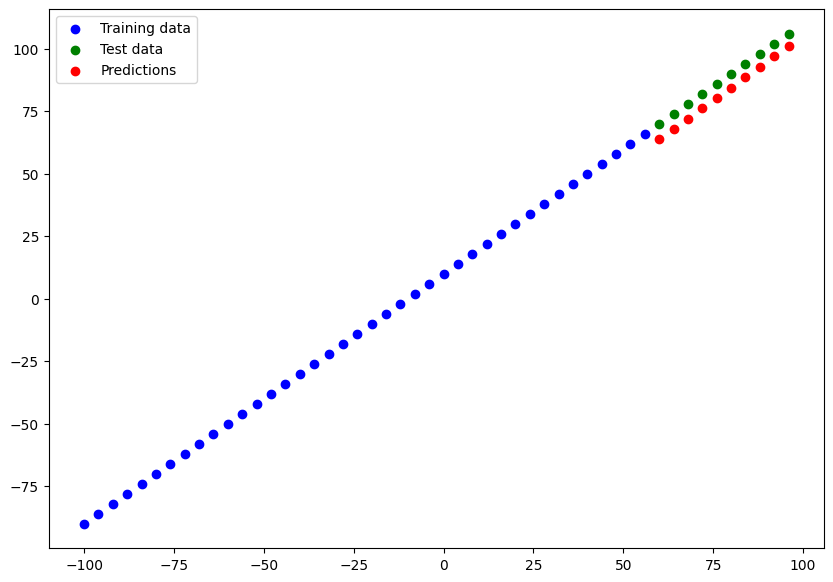

In [39]:
plot_predictions()

### Evaluating our model's prediction with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regresssion, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [40]:
# Evaluate the model on the test set
model.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - loss: 5.5697 - mae: 5.5697


[5.56967306137085, 5.56967306137085]

In [50]:
y_pred.shape

(10, 1)

In [42]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [48]:
# Calculate the mean square absolute error
mae = tf.keras.metrics.MeanAbsoluteError() ## Used during the evaluation of the performance of the model
mae_value = mae(y_test,y_pred)
mae_value

<tf.Tensor: shape=(), dtype=float32, numpy=5.56967306137085>

In [51]:
# Calculate the mean square erro
mse = tf.keras.metrics.MeanSquaredError()
mse_value = mse(y_test,tf.squeeze(y_pred))
mse_value

<tf.Tensor: shape=(), dtype=float32, numpy=31.22321128845215>

In [52]:
# Make some functions to reuse MAE and MSE
def mae(y_true,y_pred):
  mae = tf.keras.metrics.MeanAbsoluteError()
  mae_value = mae(y_test,y_pred)
  return mae_value

def mse(y_true,y_pred):
  mse = tf.keras.metrics.MeanSquaredError()
  mse_value = mse(y_test,tf.squeeze(y_pred))
  return mse_value

### Running experiments to improve our model

Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> ...

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layers.
3. Train for longer - give yopur model more og a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. 'model_1' -  same as the original model, 1 layer, trained for 100 epochs.
2. 'model_2' - 2 layers, trained for 100 epochs.
3. 'model_3' - 2 layers, trained for 500 epochs.

**Build model 1**

In [54]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 61.1492 - mae: 61.1492 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 26.5200 - mae: 26.5200
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 10.7053 - mae: 10.7053
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.2107 - mae: 10.2107
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 11.9541 - mae: 11.9541
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.8517 - mae: 8.8517
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.3210 - mae: 10.3210
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 9.8630 - mae: 9.8630
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.5252 - mae: 11.5252
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.5040 - mae: 8.5040
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 9.9727 - mae: 9.9727   
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 11.6708 - mae: 11.6708
Epoch 13/100
2/2 ━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


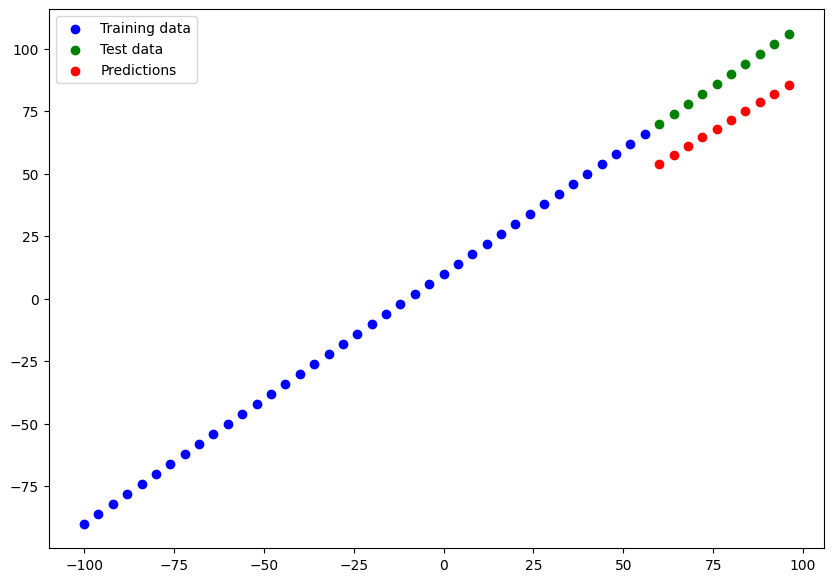

In [55]:
# Make and plot prediction for model 1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [59]:
# Calculate model 1 evaluation metrics
mae_1 = mae(y_test,y_preds_1)
mse_1 = mse(y_test,y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.22178077697754>,
 <tf.Tensor: shape=(), dtype=float32, numpy=334.0387268066406>)

** Build model_2**

* 2 dense layers, trained for 100 epochs

In [70]:
# Set de seed
tf.random.set_seed(42)

# Create the model 2

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile model_2

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# Fit the model
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 41.9352 - mse: 2488.2292 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 20.5231 - mse: 637.0600
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 20.4187 - mse: 570.8226
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 21.5387 - mse: 624.3094
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 14.6457 - mse: 311.4194
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 15.4864 - mse: 333.3266
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 15.9434 - mse: 345.0455
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.7260 - mse: 217.0618
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 14.6548 - mse: 299.9107
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 15.6165 - mse: 329.5746
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.8006 - mse: 213.6777
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 14.7996 - mse: 302.1614
Epoch 13/10

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


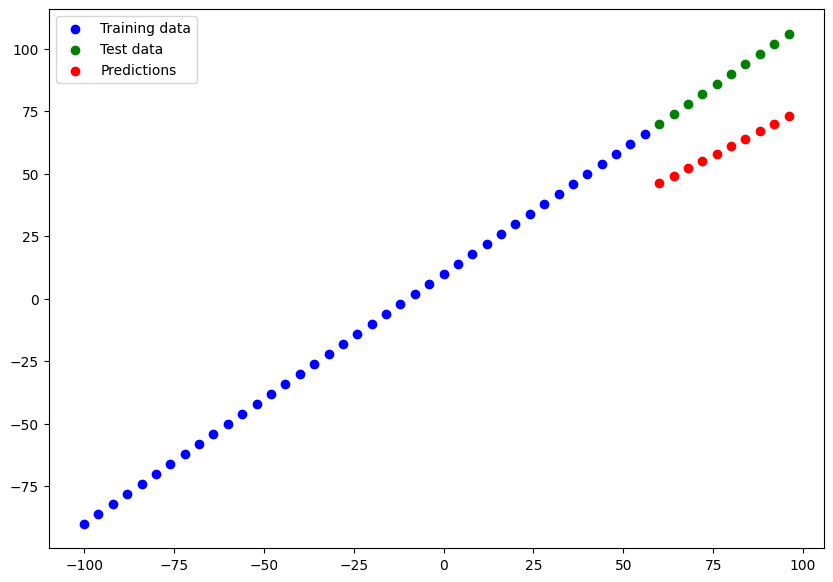

In [71]:
# plot the y_preds_2

y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [67]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test,y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=33.16221237182617>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1113.080322265625>)

**Build model 3**
* 2 lauers, traineds for 500 epochs

In [73]:
# Set de seed
tf.random.set_seed(42)

# Create the model_3

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile model_3

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500,verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


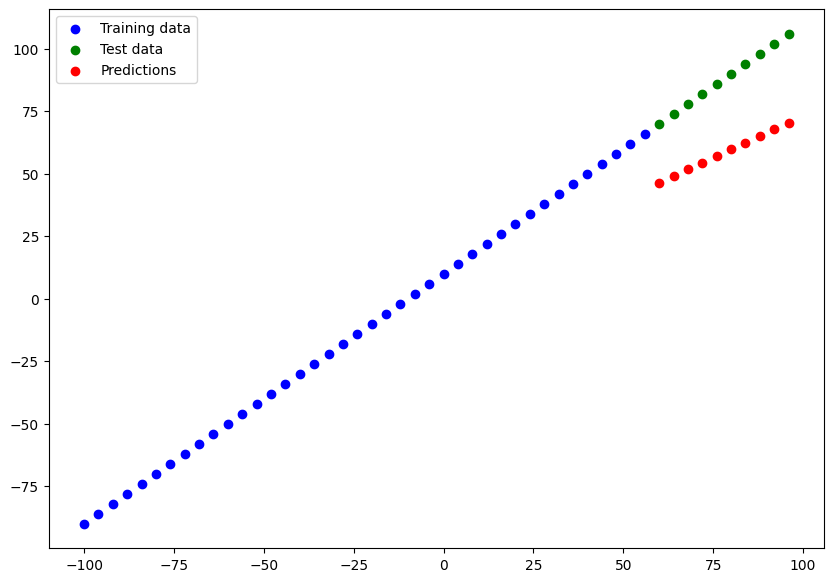

In [74]:
# Make and plor some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [75]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test,y_preds_3)
mse_3 = mse(y_test,y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=29.524883270263672>,
 <tf.Tensor: shape=(), dtype=float32, numpy=886.4176025390625>)

## Comparing the results our experiments

We've run few experiments, let's compare the results

In [79]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd
model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],
                 ["model_2",mae_2.numpy(),mse_2.numpy()],
                 ["model_3]",mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,18.221781,334.038727
1,model_2,33.162212,1113.080322
2,model_3],29.524883,886.417603


In [81]:
model_1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to helps us!

* Tensorboard
*Weights & biases

## Saving our model

Saving our model allow us to use them outside of Google Colab (or wherever they were trained) such as in a web app or a mobile app.

There are two main formats we can save our model's too:
1. The SavedModel format
2. The HDF5 format

In [83]:
# Save model using the SaveModel format
model_1.save("best_model_SavedModel_format.keras")

In [84]:
# Save model using the HDF5. format
model_1.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [85]:
# Loading in the SavedModel format
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format.keras")

In [87]:
# compare model_1 predicitons with SavedModel format model predicitons
model_1_preds = model_1.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [88]:
model_1_preds == loaded_SavedModel_format_preds
#

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A larger example

In [1]:
# import the require libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read in the insurence csv

insurence = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurence

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#Let's try one-hot encode our DataFrame so it's all be numbers
insurence_one_hot = pd.get_dummies(insurence,dtype="int") #Sprecify the type of the one hot encoding
insurence_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [4]:
# Create X & y
X = insurence_one_hot.drop("charges",axis=1)
y = insurence_one_hot["charges"]

In [5]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [6]:
# View y
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [7]:
# Create a train, test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
# Build a NN
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10170.5283 - mae: 10170.5283   
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7737.1807 - mae: 7737.1807 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7391.6758 - mae: 7391.6758 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7273.1675 - mae: 7273.1675 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7573.4263 - mae: 7573.4263 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7621.3838 - mae: 7621.3838 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7702.8979 - mae: 7702.8979 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7825.2441 - mae: 7825.2441 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7686.6621 - mae: 7686.6621 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7587.1748 - mae: 7587.1748 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7601.9155 - mae: 7601.9155 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━

In [9]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8215.5996 - mae: 8215.5996  


[8191.34912109375, 8191.34912109375]

In [10]:
y_train.median(),y_train.mean()

(9575.4421, 13346.089736364485)

Let's try to improve the model
1. Add an extra layer with more hidden units and ADAM optimizer
2. Train for longer

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
 ])

# 2. Compile the model

insurance_model_2.compile(loss=tf.keras.losses.mae,
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=["mae"])

# Fit the model
insurance_model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13273.6777 - mae: 13273.6777   
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13140.2861 - mae: 13140.2861 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12873.9609 - mae: 12873.9609 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12334.0039 - mae: 12334.0039 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11366.3945 - mae: 11366.3945 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9983.9502 - mae: 9983.9502   
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8535.2148 - mae: 8535.2148 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7610.3027 - mae: 7610.3027 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7411.4531 - mae: 7411.4531 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7377.1001 - mae: 7377.1001 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7355.5747 - mae: 7355.5747 
Epoch 12/100
34/34 ━━━━━━━━

In [12]:
# Evaluate the model
insurance_model_2.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4929.1118 - mae: 4929.1118 


[4786.70458984375, 4786.70458984375]

In [13]:
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8215.5996 - mae: 8215.5996 


[8191.34912109375, 8191.34912109375]

In [14]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model

history = insurance_model_3.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13267.8643 - mae: 13267.8643   
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13129.2432 - mae: 13129.2432 
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12844.0859 - mae: 12844.0859 
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12272.4863 - mae: 12272.4863 
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11271.4043 - mae: 11271.4043 
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9874.4209 - mae: 9874.4209
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8440.0322 - mae: 8440.0322 
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7563.3315 - mae: 7563.3315 
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7401.3477 - mae: 7401.3477 
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7371.5605 - mae: 7371.5605
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7350.0044 - mae: 7350.0044
Epoch 12/200
34/34 ━━━━━━━━━━━━━

In [15]:
# Evaluate the model
insurance_model_3.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3471.7939 - mae: 3471.7939 


[3405.683837890625, 3405.683837890625]

In [16]:
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8215.5996 - mae: 8215.5996 


[8191.34912109375, 8191.34912109375]

Text(0.5, 0, 'epochs')

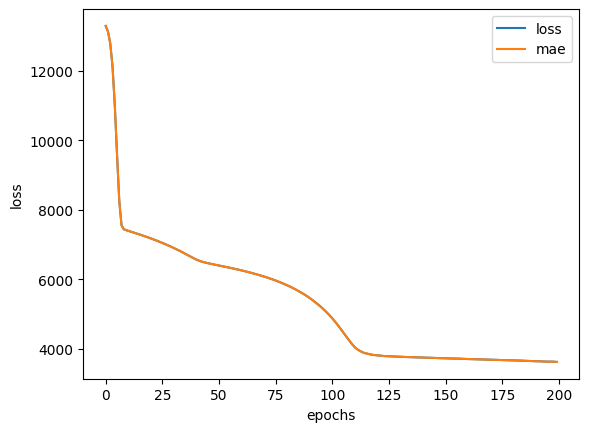

In [17]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#Read the insurance dataframe

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from scikitlearn.

In [23]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# Create X & y

X = insurance.drop("charges",axis=1)
y = insurance["charges"]

# Build our train and test set

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Fit the column tranformer to our training data

ct.fit(X_train)

# Transform training and test data with normalization and OneHotEncoder

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [24]:
# What does our data look like now?

X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [25]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [26]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

In [29]:
# Set the random seed
tf.random.set_seed(42)

# Create the model

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model

insurance_model_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# Fit the model

insurance_model_4.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13297.5244 - mae: 13297.5244   
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13291.4492 - mae: 13291.4492 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13274.9727 - mae: 13274.9727 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13237.5264 - mae: 13237.5264 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13168.0312 - mae: 13168.0312 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13055.2969 - mae: 13055.2969 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12888.8584 - mae: 12888.8584 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12658.6553 - mae: 12658.6553 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12354.8828 - mae: 12354.8828 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11969.9785 - mae: 11969.9785 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11510.3594 - mae: 11510.3594 
Epoch 12/100
34/3

In [30]:
# Evañiuate our insurance model

insurance_model_4.evaluate(X_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3518.4150 - mae: 3518.4150  


[3432.50048828125, 3432.50048828125]

<Axes: ylabel='Frequency'>

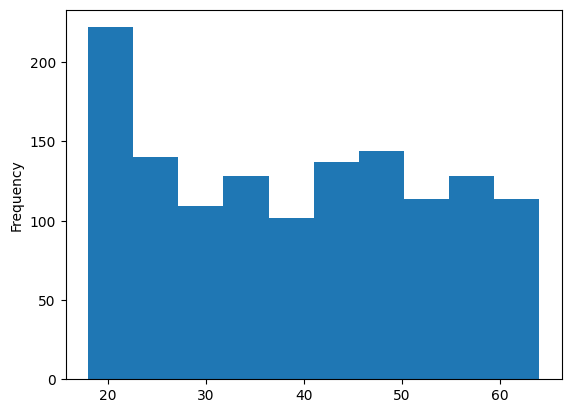

In [19]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

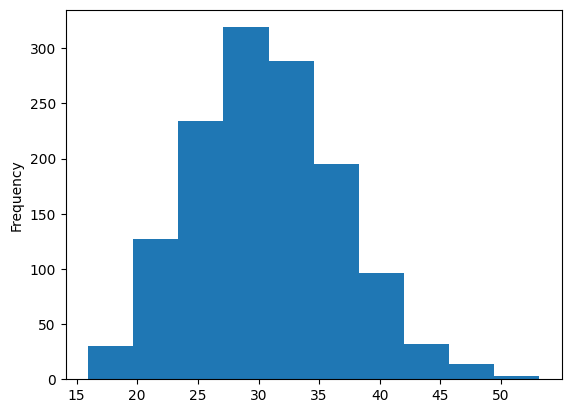

In [20]:
X["bmi"].plot(kind="hist")

In [21]:
X["children"].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18
